# Binary classification on Lymphoma dataset
We will work on the lymphoma disease dataset (shipp - 2002).
A binary-class dataset with 7129 features and sample size is 77. The classes are "DLBCL" & "FL".

source: <br>
https://github.com/ramhiser/datamicroarray <br>
https://github.com/ramhiser/datamicroarray/wiki/Shipp-%282002%29

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Dataset exploring

### read the dataset

In [3]:
initial_data = pd.read_csv('Lymphoma2xy.csv')

initial_data.head()

V1   V2  V3   V4   V5   V6   V7   V8   V9  V10      ...       V7121  \
0 -104 -187 -26   59 -238 -258 -400 -146  -34 -100      ...        1036   
1 -152 -328 -52  267 -300 -314  578 -185  111  148      ...        4254   
2 -158 -129  11   88 -239 -429 -891 -258   22 -271      ...        1934   
3 -124 -121  -3  -37 -210 -309 -489  -69  -35  172      ...        2469   
4  -93 -258 -36  109 -109 -272 -469 -279  -90  -31      ...         608   

   V7122  V7123  V7124  V7125  V7126  V7127  V7128  V7129  shipp...y...  
0   -161   1523    -72    897    366      3     76    -28         DLBCL  
1    -75   6056    -68    737     81     -4     41    -45         DLBCL  
2   -129   2901     -9    946    450     38    164    -62         DLBCL  
3     93   2465   -119    339    321    -63     73    -13         DLBCL  
4    -39   1667    -87    721    213     15    155    -26         DLBCL  

[5 rows x 7130 columns]

Binary "shipp...y..." class label inputs

In [4]:
initial_data['shipp...y...']=initial_data['shipp...y...'].map({'DLBCL':1,'FL':0})

initial_data.head()

V1   V2  V3   V4   V5   V6   V7   V8   V9  V10      ...       V7121  \
0 -104 -187 -26   59 -238 -258 -400 -146  -34 -100      ...        1036   
1 -152 -328 -52  267 -300 -314  578 -185  111  148      ...        4254   
2 -158 -129  11   88 -239 -429 -891 -258   22 -271      ...        1934   
3 -124 -121  -3  -37 -210 -309 -489  -69  -35  172      ...        2469   
4  -93 -258 -36  109 -109 -272 -469 -279  -90  -31      ...         608   

   V7122  V7123  V7124  V7125  V7126  V7127  V7128  V7129  shipp...y...  
0   -161   1523    -72    897    366      3     76    -28             1  
1    -75   6056    -68    737     81     -4     41    -45             1  
2   -129   2901     -9    946    450     38    164    -62             1  
3     93   2465   -119    339    321    -63     73    -13             1  
4    -39   1667    -87    721    213     15    155    -26             1  

[5 rows x 7130 columns]

### checking for missing values

In [5]:
missing_value_found = False

for c in initial_data.columns:
    no_missing = initial_data[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
        missing_value_found = True
        
if missing_value_found:
    print("There is missing values in the dataset.")
else:
    print("There is no missing values in the dataset.")

There is no missing values in the dataset.


### class distribution

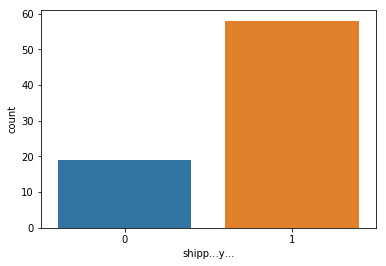

In [6]:
sns.countplot(initial_data['shipp...y...']) #,label="Sum"

plt.show()

In [7]:
X = initial_data.drop(['shipp...y...'],axis=1)

y = initial_data['shipp...y...']

X

V1    V2   V3   V4   V5   V6    V7   V8   V9   V10  ...    V7120  V7121  \
0   -104  -187  -26   59 -238 -258  -400 -146  -34  -100  ...      132   1036   
1   -152  -328  -52  267 -300 -314   578 -185  111   148  ...      147   4254   
2   -158  -129   11   88 -239 -429  -891 -258   22  -271  ...      169   1934   
3   -124  -121   -3  -37 -210 -309  -489  -69  -35   172  ...       13   2469   
4    -93  -258  -36  109 -109 -272  -469 -279  -90   -31  ...       69    608   
5    -34  -257 -104   71 -196 -250    10 -139   23   -30  ...       47   1366   
6   -251  -264  -99   31 -244 -110   128  -47   24   -79  ...       27   3242   
7   -204  -293  -32  148 -327 -215   -79 -196  -57  -129  ...       40   1499   
8   -144  -356 -194   84 -269 -235  -268 -136    1  -329  ...       89    604   
9    -94  -204  -28   53 -166 -284  -168 -158  -32    90  ...      151   5936   
10  -420  -360   17   72 -297 -389  -588 -174 -120   -55  ...      -57   1488   
11  -120  -168  -84  108 -159 -201   -23 -181   43    96  ...       82   1425   
12  -156  -128   62  306  -85 -259   -63  -69 -168  -146  ...      184    553   
13  -228  -152  -48  334 -191 -509  -394 -242   29  -260  ...      242   1444   
14  -128  -105  -79  157 -314 -548    69 -182   66  -159  ...      152   1066   
15   -33  -129  -45  237 -175 -269   -18 -202  -27   323  ...      118    641   
16  -296  -133   83  181  -83 -418   192  -90  -84    42  ...      251    796   
17  -182  -132  101  193 -245 -328  -280  -79   29   115  ...      170    320   
18   -10   -46   44  237 -193 -506  -861 -129   96   135  ...      213   2592   
19  -238  -262  -13  140 -172 -272  -378  -93  -93  -189  ...      247    479   
20   -66  -151  -31   79 -212 -455  -186 -311  127   101  ...      212   1091   
21  -416  -318  -37  388 -136 -479  -643 -131 -130  -282  ...      409   2690   
22    -7   -87    4  136 -125 -208  -206  -62  -48   161  ...       94    402   
23   -44  -153  -35  198  -82 -389  -136 -273  104   174  ...       69    258   
24   -81  -159  -43  374 -148 -424  -842 -301  -39  -227  ...       89   1073   
25   -75  -127    0  200 -280 -507  -307 -152   91  -315  ...        0   1394   
26  -260  -158 -114   63 -287 -374  -213 -192  120  -637  ...       60    605   
27   -56   -98  -55   29 -126 -411  -314 -221  -16  -173  ...       80    619   
28  -160  -178  157  148  -75 -297  -267 -118  242  -231  ...      114    770   
29  -301  -228   -4   22 -198 -253   -85 -181   38   -87  ...      255   1012   
..   ...   ...  ...  ...  ...  ...   ...  ...  ...   ...  ...      ...    ...   
47   -71  -103   58  103  -58 -323  -608 -127  -33   246  ...       66    444   
48  -210  -173 -145   53  -49 -163   256 -124  -97   -43  ...      105   2234   
49   -81   -64  -47  197 -240 -338  -172 -200 -105  -219  ...      176   1215   
50  -137  -233 -102  106 -213 -312  -859  -52    5   143  ...      179   1021   
51     9  -305   99  270   46 -321  -531 -150    5   437  ...      107    643   
52  -103  -112  -22  227  -57 -259  -184 -146  -56   245  ...      121    841   
53  -102   -83   25  218 -142 -655  -397 -154  120  -233  ...      180   1646   
54   -74   -96   -4  203  -88 -313    80 -152  -70    17  ...      302   2219   
55  -104  -119 -124  230 -108 -363  -496 -218  -13  -225  ...      138    693   
56  -100  -249    9   84 -178 -179   137  -86   28   169  ...      242   1065   
57   -44   -65  145  195  -51 -308   -86 -254   13  -234  ...      299    985   
58 -1232  -439  143   31 -175 -452   -49 -155  -64  -159  ...      254   1208   
59   -87  -145   74  114 -236 -385  -401  -46   98   122  ...      147   1690   
60 -1074  -388 -148   66 -158 -573  -577 -160  -66  -503  ...      244   1145   
61  -821  -349 -206   93 -281 -435     0 -440   52  -564  ...      270   1311   
62  -234  -233  -68   58 -268 -254  -402 -147    2   222  ...      281    786   
63 -1760 -1154  115  394 -558 -652 -2721 -300  583 -1008  ...      635    845   
64  -119  -129 -103   29 -229 -462  -

We will also create a 2-dimensional plot function, plot_2d_space, to see the data distribution:

In [8]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

In [9]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

plot_2d_space(x_pca, y, 'Imbalanced dataset (2 PCA components)')

So it's a good idea to look for solutions dedicated for highly imbalanced cases. <br>
We will use random under-sampling which allows us avoid loosing information.

## Data preprocessing
In this step we want to use log transformation on our dataset then normalize it. <br> 
But the problem of log transformation is that datas should not be negative. So we first will transform them all to positve numbers.<br>
Then we are readhy to do log transformation.

### Transform data to positive numbers
All we need to do is simply adding datas of each feature with minimum number of that feature plus one.<br>
So the minimum of all features will be 1 which after log transformation turns to zero.

In [11]:
col_names = ["V{}".format(i) for i in range(1,7130)]
zeros_77 = [0 for i in range(0,77)]
zeros_table = {col_names[i] : zeros_77 for i in range(len(col_names))}

X_positive = pd.DataFrame(zeros_table)

for i in range(1,7130):
    X_positive["V{}".format(i)] = X["V{}".format(i)] + abs(X["V{}".format(i)].min()) + 1

X_positive

V1    V2   V3   V4   V5   V6    V7   V8   V9   V10  ...    V7120  V7121  \
0   1657   968  212   97  321  514  2322  295  162   909  ...      190   1295   
1   1609   827  186  305  259  458  3300  256  307  1157  ...      205   4513   
2   1603  1026  249  126  320  343  1831  183  218   738  ...      227   2193   
3   1637  1034  235    1  349  463  2233  372  161  1181  ...       71   2728   
4   1668   897  202  147  450  500  2253  162  106   978  ...      127    867   
5   1727   898  134  109  363  522  2732  302  219   979  ...      105   1625   
6   1510   891  139   69  315  662  2850  394  220   930  ...       85   3501   
7   1557   862  206  186  232  557  2643  245  139   880  ...       98   1758   
8   1617   799   44  122  290  537  2454  305  197   680  ...      147    863   
9   1667   951  210   91  393  488  2554  283  164  1099  ...      209   6195   
10  1341   795  255  110  262  383  2134  267   76   954  ...        1   1747   
11  1641   987  154  146  400  571  2699  260  239  1105  ...      140   1684   
12  1605  1027  300  344  474  513  2659  372   28   863  ...      242    812   
13  1533  1003  190  372  368  263  2328  199  225   749  ...      300   1703   
14  1633  1050  159  195  245  224  2791  259  262   850  ...      210   1325   
15  1728  1026  193  275  384  503  2704  239  169  1332  ...      176    900   
16  1465  1022  321  219  476  354  2914  351  112  1051  ...      309   1055   
17  1579  1023  339  231  314  444  2442  362  225  1124  ...      228    579   
18  1751  1109  282  275  366  266  1861  312  292  1144  ...      271   2851   
19  1523   893  225  178  387  500  2344  348  103   820  ...      305    738   
20  1695  1004  207  117  347  317  2536  130  323  1110  ...      270   1350   
21  1345   837  201  426  423  293  2079  310   66   727  ...      467   2949   
22  1754  1068  242  174  434  564  2516  379  148  1170  ...      152    661   
23  1717  1002  203  236  477  383  2586  168  300  1183  ...      127    517   
24  1680   996  195  412  411  348  1880  140  157   782  ...      147   1332   
25  1686  1028  238  238  279  265  2415  289  287   694  ...       58   1653   
26  1501   997  124  101  272  398  2509  249  316   372  ...      118    864   
27  1705  1057  183   67  433  361  2408  220  180   836  ...      138    878   
28  1601   977  395  186  484  475  2455  323  438   778  ...      172   1029   
29  1460   927  234   60  361  519  2637  260  234   922  ...      313   1271   
..   ...   ...  ...  ...  ...  ...   ...  ...  ...   ...  ...      ...    ...   
47  1690  1052  296  141  501  449  2114  314  163  1255  ...      124    703   
48  1551   982   93   91  510  609  2978  317   99   966  ...      163   2493   
49  1680  1091  191  235  319  434  2550  241   91   790  ...      234   1474   
50  1624   922  136  144  346  460  1863  389  201  1152  ...      237   1280   
51  1770   850  337  308  605  451  2191  291  201  1446  ...      165    902   
52  1658  1043  216  265  502  513  2538  295  140  1254  ...      179   1100   
53  1659  1072  263  256  417  117  2325  287  316   776  ...      238   1905   
54  1687  1059  234  241  471  459  2802  289  126  1026  ...      360   2478   
55  1657  1036  114  268  451  409  2226  223  183   784  ...      196    952   
56  1661   906  247  122  381  593  2859  355  224  1178  ...      300   1324   
57  1717  1090  383  233  508  464  2636  187  209   775  ...      357   1244   
58   529   716  381   69  384  320  2673  286  132   850  ...      312   1467   
59  1674  1010  312  152  323  387  2321  395  294  1131  ...      205   1949   
60   687   767   90  104  401  199  2145  281  130   506  ...      302   1404   
61   940   806   32  131  278  337  2722    1  248   445  ...      328   1570   
62  1527   922  170   96  291  518  2320  294  198  1231  ...      339   1045   
63     1     1  353  432    1  120     1  141  779     1  ...      693   1104   
64  1642  1026  135   67  330  310  1

### Log transformation

In [12]:
log_transformer = preprocessing.FunctionTransformer(np.log, validate=True)
X_log_transformed = pd.DataFrame(log_transformer.transform(X_positive))
X_log_transformed

0         1         2         3         4         5         6     \
0   7.412764  6.875232  5.356586  4.574711  5.771441  6.242223  7.750184   
1   7.383368  6.717805  5.225747  5.720312  5.556828  6.126869  8.101678   
2   7.379632  6.933423  5.517453  4.836282  5.768321  5.837730  7.512618   
3   7.400621  6.941190  5.459586  0.000000  5.855072  6.137727  7.711101   
4   7.419381  6.799056  5.308268  4.990433  6.109248  6.214608  7.720018   
5   7.454141  6.800170  4.897840  4.691348  5.894403  6.257668  7.912789   
6   7.319865  6.792344  4.934474  4.234107  5.752573  6.495266  7.955074   
7   7.350516  6.759255  5.327876  5.225747  5.446737  6.322565  7.879670   
8   7.388328  6.683361  3.784190  4.804021  5.669881  6.285998  7.805475   
9   7.418781  6.857514  5.347108  4.510860  5.973810  6.190315  7.845416   
10  7.201171  6.678342  5.541264  4.700480  5.568345  5.948035  7.665753   
11  7.403061  6.894670  5.036953  4.983607  5.991465  6.347389  7.900637   
12  7.380879  6.934397  5.703782  5.840642  6.161207  6.240276  7.885705   
13  7.334982  6.910751  5.247024  5.918894  5.908083  5.572154  7.752765   
14  7.398174  6.956545  5.068904  5.273000  5.501258  5.411646  7.934155   
15  7.454720  6.933423  5.262690  5.616771  5.950643  6.220590  7.902487   
16  7.289611  6.929517  5.771441  5.389072  6.165418  5.869297  7.977282   
17  7.364547  6.930495  5.826000  5.442418  5.749393  6.095825  7.800573   
18  7.467942  7.011214  5.641907  5.616771  5.902633  5.583496  7.528869   
19  7.328437  6.794587  5.416100  5.181784  5.958425  6.214608  7.759614   
20  7.435438  6.911747  5.332719  4.762174  5.849325  5.758902  7.838343   
21  7.204149  6.729824  5.303305  6.054439  6.047372  5.680173  7.639642   
22  7.469654  6.973543  5.488938  5.159055  6.073045  6.335054  7.830426   
23  7.448334  6.909753  5.313206  5.463832  6.167516  5.948035  7.857868   
24  7.426549  6.903747  5.273000  6.021023  6.018593  5.852202  7.539027   
25  7.430114  6.935370  5.472271  5.472271  5.631212  5.579730  7.789455   
26  7.313887  6.904751  4.820282  4.615121  5.605802  5.986452  7.827640   
27  7.441320  6.963190  5.209486  4.204693  6.070738  5.888878  7.786552   
28  7.378384  6.884487  5.978886  5.225747  6.182085  6.163315  7.805882   
29  7.286192  6.831954  5.455321  4.094345  5.888878  6.251904  7.877397   
..       ...       ...       ...       ...       ...       ...       ...   
47  7.432484  6.958448  5.690359  4.948760  6.216606  6.107023  7.656337   
48  7.346655  6.889591  4.532599  4.510860  6.234411  6.411818  7.999007   
49  7.426549  6.994850  5.252273  5.459586  5.765191  6.073045  7.843849   
50  7.392648  6.826545  4.912655  4.969813  5.846439  6.131226  7.529943   
51  7.478735  6.745236  5.820083  5.730100  6.405228  6.111467  7.692113   
52  7.413367  6.949856  5.375278  5.579730  6.218600  6.240276  7.839132   
53  7.413970  6.977281  5.572154  5.545177  6.033086  4.762174  7.751475   
54  7.430707  6.965080  5.455321  5.484797  6.154858  6.129050  7.938089   
55  7.412764  6.943122  4.736198  5.590987  6.111467  6.013715  7.707962   
56  7.415175  6.809039  5.509388  4.804021  5.942799  6.385194  7.958227   
57  7.448334  6.993933  5.948035  5.451038  6.230481  6.139885  7.877018   
58  6.270988  6.573680  5.942799  4.234107  5.950643  5.768321  7.890957   
59  7.422971  6.917706  5.743003  5.023881  5.777652  5.958425  7.749753   
60  6.532334  6.642487  4.499810  4.644391  5.993961  5.293305  7.670895   
61  6.845880  6.692084  3.465736  4.875197  5.627621  5.820083  7.909122   
62  7.331060  6.826545  5.135798  4.564348  5.673323  6.249975  7.749322   
63  0.000000  0.000000  5.866468  6.068426  0.000000  4.787492  0.000000   
64  7.403670  6.933423  4.905275  4.204693  5.799093  5.736572  7.455298   
65  7.398174  6.925595  5.549076  5.488938  6.198479  6.267201  7.646354   
66  7.383368  6.977281  5.056246  4.976734  6.163315  6.167516  7.715570   
67  7.425358  6.955593  5.910797  5.659482  5.796058  5.

### Standardization
Now after perform log tranformation, it's time to standardize the data which transforms it such that
the resulting distribution has an approximate mean of 0 and an approximate standard deviation of 1.

In [13]:
standard_scaler = preprocessing.StandardScaler()

standard_scaler.fit(X_log_transformed)

X_standardized = pd.DataFrame(standard_scaler.transform(X_log_transformed))

print("Standardized data maximum standard deviation = {}".format(X_standardized.std(axis=0).max()))
print("Standardized data minimum standard deviation = {}\n".format(X_standardized.std(axis=0).min()))
print("Standardized data maximum mean = {}".format(X_standardized.mean(axis=0).max()))
print("Standardized data minimum mean = {}".format(X_standardized.mean(axis=0).min()))

Standardized data maximum standard deviation = 1.006557447310805
Standardized data minimum standard deviation = 1.0065574473108034

Standardized data maximum mean = 2.8117479484695035e-14
Standardized data minimum mean = -4.4737662348142024e-14


### Random under-sampling 
With a function with pandas dataframe input, We will randomly select samples from majority class, several times.<br> 
So the number of samples from each class will be equal 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized,y,test_size=0.34)

In [33]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()